# Image to String 

In [24]:
import cv2
import pytesseract
import numpy as np
from PIL import Image
# import time
 
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
path = 'C:\\Users\\201802050007\\Desktop\\ObjectDetection\\Text Detection\\Captcha\\2.png'

def empty(a):
    pass

#Open gambar yg kita mau olah
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.GaussianBlur(img,(7,7),1)
# img = cv2.Canny(img,50,50)

# img[np.where((img==[255,255,255]).all(axis=2))] = [0,255,255]


#Resize image
print(img.shape) #hasil dari shape adalah lebar/tinggi, panjang, tipe color BGR2RGB
img = cv2.resize(img,(1200,700)) #resize image dengan panjang 500 dan tinggi/lebar 100

ret, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)


# # #Processing image
# # k = np.array(np.zeros((3,3),np.float32))
# k = np.array(([-1,0,0],
#               [0,4,0],
#               [0,0,-1],),np.float32)
# img = cv2.filter2D(img,-1,k)

# smoothing the image
img = cv2.medianBlur(img, 5)
#edge detection    
img = cv2.Canny(img, 100, 200)

# #men set filter HSV untuk mendapatkan setting warna hitam
# cv2.namedWindow("TrackBars")
# cv2.resizeWindow("TrackBars",640,240)
# cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
# cv2.createTrackbar("Hue Max","TrackBars",19,179,empty)
# cv2.createTrackbar("Sat Min","TrackBars",110,255,empty)
# cv2.createTrackbar("Sat Max","TrackBars",240,255,empty)
# cv2.createTrackbar("Val Min","TrackBars",153,255,empty)
# cv2.createTrackbar("Val Max","TrackBars",255,255,empty)
 
# while True:
#     img = cv2.imread(path)
#     imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#     h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
#     h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
#     s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
#     s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
#     v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
#     v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
#     print(h_min,h_max,s_min,s_max,v_min,v_max)
#     lower = np.array([h_min,s_min,v_min])
#     upper = np.array([h_max,s_max,v_max])
#     mask = cv2.inRange(imgHSV,lower,upper)
#     img = cv2.bitwise_and(img,img,mask=mask)

# img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# lower = np.array([0,0,0])
# upper = np.array([255,255,255])
# mask = cv2.inRange(img,lower,upper)
# img = cv2.bitwise_and(img,img,mask=mask)

# # smoothing the image
# img = cv2.medianBlur(img, 5)
# # img = cv2.GaussianBlur(img, (7,7),3)
# #edge detection    
# img = cv2.Canny(img, 100, 300)

cv2.imwrite('img_2.png',img)
#print hasil text detection ke string
# configuration = '--tessdata-dir "C:/Program Files/Tesseract-OCR/tessdata" --oem 3 --psm 13'
Text2String = pytesseract.image_to_string(img)
# Text2String = Text2String.replace(' ','')
print(Text2String)

#tampilkan img
cv2.imshow('Gambar Captcha', img)
cv2.waitKey(0)

(110, 425)
ae


-1

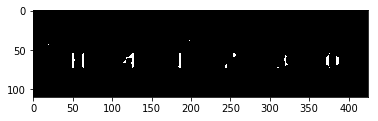

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(path)
#make image gray 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Blur
blur = cv2.GaussianBlur(gray,(5,5),0)
bilateral = cv2.bilateralFilter(gray,5,75,75)

#Thresholding
ret, thresh = cv2.threshold(bilateral,25,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#Kernal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

#other things
erosion = cv2.erode(thresh,kernel,iterations = 1)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel, iterations = 1)

#Transform image
dist_transform = cv2.distanceTransform(closing,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.02*dist_transform.max(),255,cv2.THRESH_BINARY)#,255,0)

#kernel_1
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 2))

dilation_1 = cv2.dilate(sure_fg,kernel_1,iterations = 2)
erosion_1 = cv2.erode(dilation_1,kernel_1,iterations = 3)

plt.imshow(erosion_1, 'gray')

In [ ]:
img = cv2.imread(path)
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

#print hasil text detection ke string
# configuration = '--tessdata-dir "C:/Program Files/Tesseract-OCR/tessdata" --oem 3 --psm 13'
Text2String = pytesseract.image_to_string(img)
# Text2String = Text2String.replace(' ','')
print(Text2String)

#tampilkan img
cv2.imshow('Gambar Captcha', img)
cv2.waitKey(0)

# Detect Character

In [22]:
import cv2
import pytesseract
 
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
 
img = cv2.imread('1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
hImg, wImg,_ = img.shape
configuration = r'--oem 3 --psm 6 ouputbase digits'
boxes = pytesseract.image_to_boxes(img,config=configu)
for b in boxes.splitlines():
    print(b)
    b = b.split(' ')
    print(b)
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
    cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)

cv2.imshow('img', img)
cv2.waitKey(0)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


-1

# Detect Word

In [1]:
import cv2
import pytesseract
 
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
 
img = cv2.imread('test.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
#[   0          1           2           3           4          5         6       7       8        9        10       11 ]
#['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
boxes = pytesseract.image_to_data(img)
for a,b in enumerate(boxes.splitlines()):
        print(b)
        if a!=0:
            b = b.split()
            if len(b)==12:
                x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
                cv2.putText(img,b[11],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)
                cv2.rectangle(img, (x,y), (x+w, y+h), (50, 50, 255), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	779	380	-1	
2	1	1	0	0	0	68	85	637	123	-1	
3	1	1	1	0	0	68	85	637	123	-1	
4	1	1	1	1	0	68	85	637	67	-1	
5	1	1	1	1	1	68	85	299	54	91	Murtaza's
5	1	1	1	1	2	389	86	316	66	96	Workshop
4	1	1	1	2	0	220	172	272	36	-1	
5	1	1	1	2	1	220	172	174	36	93	Robotics
5	1	1	1	2	2	410	172	30	36	93	&
5	1	1	1	2	3	454	175	38	32	97	Al
2	1	2	0	0	0	42	276	686	34	-1	
3	1	2	1	0	0	42	276	686	34	-1	
4	1	2	1	1	0	42	276	686	34	-1	
5	1	2	1	1	1	42	276	686	34	91	123456789101112131415


-1